## learning-AI : install_pytorch
### topic 2 : 2강

<br>

- **임규연 (lky473736)**
- 2025.07.17.
- Reference
    - https://www.youtube.com/watch?v=gzJt_qjZJ7M&list=PL_iJu012NOxdhFmM2aw6bwpZTMFdsPxws

------

### 2강. autograd

- autograd : gradient를 자동으로 계산해준다
    - gradient는 여기서 weight, bias를 의미하겠음
    - computational graph의 편미분 혹은 Hypothesis의 연산 과정을 자동 계산해주는 것
    - computational graph를 컴퓨터 자체적으로 그리고 편미분해서 back propagation을 진행한다

In [1]:
import torch

x = torch.tensor([1.],  # 1. == 1.0 (실수여야만 미분 가능해서)
                 requires_grad = True) # default : False
print (x) 

# requires_grad : autograd 사용하게 하는 tensor (gradient)

tensor([1.], requires_grad=True)


In [2]:
x = torch.tensor([1.], requires_grad=True)
y = x ** 2
print (y) # grad_fn에 PowBackward가 붙어있음 (계산과정이 붙여져있음)
y = 1 + (y * 2)
print (y) # 또 AddBackward가 붙여져있음

print (x.grad)
y.backward() # 편미분한다 (y = 1 + 2*x**2 -> 4*x)
print (x.grad) # 4*x에 1 넣음 (왜냐면 torch.tensor[1.]로 정의되어있어서)

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<AddBackward0>)
None
tensor([4.])


In [3]:
x = torch.tensor([2.], requires_grad=True) # leaf tensor (가장 종단의 입력변수 )
y = x ** 2
print (y) 
y.retain_grad() # 중간에 dz/dy 알고 싶으면 이거 하기

z = 3 * y
print (z)

# grad_fn : 가장 마지막 연산에 어떤 것을 하였는가? (x에 대하여)

z.backward() 
print (x.grad, y.grad) # chain rule로 알아내게 됨 (computational graph)

tensor([4.], grad_fn=<PowBackward0>)
tensor([12.], grad_fn=<MulBackward0>)
tensor([12.]) tensor([3.])


In [4]:
x = torch.tensor([1.], 
                 requires_grad=True)
a = x ** 2
b = a + 1

print (a, b)

c = b ** 2
c.backward()
print (x.grad)

tensor([1.], grad_fn=<PowBackward0>) tensor([2.], grad_fn=<AddBackward0>)
tensor([8.])


In [5]:
# 2원 변수
# backward와 requires_grad는 computational graph를 그려서 생각

x = torch.tensor([1.], 
                 requires_grad=True)
y = torch.tensor([1.], 
                 requires_grad=True)

z = 2*x**2 + y**2 
print (z)
z.backward()

print (x.grad)
print (y.grad)

tensor([3.], grad_fn=<AddBackward0>)
tensor([4.])
tensor([2.])


In [6]:
# 벡터 변수에 대해 편미분

x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.sum(x**2) # x1**2 + x2**2 + x3**2
y.backward()
print (y)

print (x.grad) 

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


In [7]:
# transfer learning할 때는 requires_grad를 False로 둘 때가 있다
# freezing하기 위하여 (학습을 하지 않게끔 하기 위하여)

x = torch.tensor([1.], 
                 requires_grad=True)
x.requires_grad = False

y = 2*x
# y.backward() <-- error!!

print (x.grad) # None. requires_grad를 False로 두니깐

None


In [8]:
# detach : requires_grad를 떼버린다 
# -> 그 값이랑 똑같은 것을 가지는 tensor를 새롭게 만든다

x = torch.tensor([1.], 
                 requires_grad=True)
x2 = x.detach() # <-- requires_grad가 False인 새로운 텐서를 만든다
print (x)
print (x2)

y = x ** 2
print (y)

z = y + x2

print (z)

z.backward()

tensor([1.], requires_grad=True)
tensor([1.])
tensor([1.], grad_fn=<PowBackward0>)
tensor([2.], grad_fn=<AddBackward0>)


In [9]:
# torch.no_grad
# chain rule을 위해선 grad_fn이 update가 되어야함
# 하지만 잠깐 계산하고 싶지 않다면 no_grad (모델 테스트 시에 메모리를 쓸 필요 없음)

x = torch.tensor([1.], 
                 requires_grad=True)

with torch.no_grad() : 
    y = x ** 2
    print (x.requires_grad)
    print (y) # grad_fn을 계산하지 않는다 (메모리 소모가 줄것임)
    
print (x.requires_grad)
print (y)

True
tensor([1.])
True
tensor([1.])


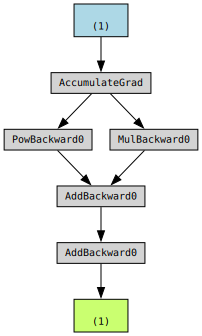

In [10]:
from torchviz import make_dot

x = torch.tensor([1.], requires_grad=True)
y = x**2 + 2*x + 1

make_dot(y)

# accumulate grad : 더하기

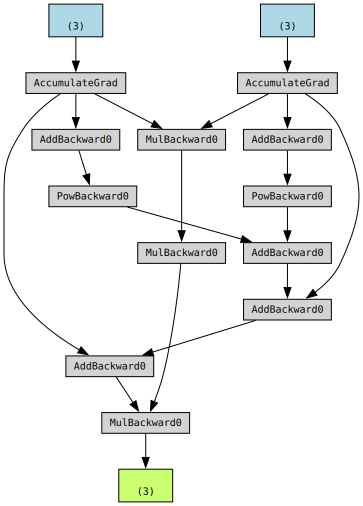

In [11]:
from torchviz import make_dot

x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([2., 3., 4], requires_grad=True)

make_dot(x*y*2*(((x+3)**2 + (y+3)**2)+x+y))

# accumulate grad : 더하기